In [7]:
import numpy as np
import pandas as pd
import os
from keras.layers import Input,Lambda,Dense,Flatten,Conv2D,MaxPooling2D
from keras.models import Model,Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [8]:
image_size=[224,224]
train_path='/content/drive/MyDrive/Colab Notebooks/pnevmoniya/train'
test_path='/content/drive/MyDrive/Colab Notebooks/pnevmoniya/val'
val_path='/content/drive/MyDrive/Colab Notebooks/pnevmoniya/test_dataset'

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
train_data=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 4445 images belonging to 2 classes.


In [11]:
test_data=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 771 images belonging to 2 classes.


In [12]:
val_data=val_datagen.flow_from_directory(val_path, target_size=(224,224),batch_size=1,class_mode='categorical')

Found 624 images belonging to 2 classes.


In [13]:
cnnmodel=Sequential()
cnnmodel.add(Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)))
cnnmodel.add(MaxPooling2D((2,2)))
cnnmodel.add(Conv2D(64,(3,3),activation='relu'))
cnnmodel.add(MaxPooling2D((2,2)))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(32,activation='relu'))
cnnmodel.add(Dense(2,activation='softmax'))

In [14]:
cnnmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
res_cnnmodel=cnnmodel.fit(train_data,validation_data=test_data,epochs=11)


Epoch 1/11
139/139 [==============================] - 599s 4s/step - loss: 0.5270 - accuracy: 0.8250 - val_loss: 0.1309 - val_accuracy: 0.9611
Epoch 2/11
139/139 [==============================] - 102s 735ms/step - loss: 0.2222 - accuracy: 0.9114 - val_loss: 0.0914 - val_accuracy: 0.9637
Epoch 3/11
139/139 [==============================] - 102s 735ms/step - loss: 0.2199 - accuracy: 0.9096 - val_loss: 0.0891 - val_accuracy: 0.9754
Epoch 4/11
139/139 [==============================] - 102s 730ms/step - loss: 0.2131 - accuracy: 0.9123 - val_loss: 0.1535 - val_accuracy: 0.9364
Epoch 5/11
139/139 [==============================] - 102s 731ms/step - loss: 0.2072 - accuracy: 0.9172 - val_loss: 0.0935 - val_accuracy: 0.9702
Epoch 6/11
139/139 [==============================] - 102s 730ms/step - loss: 0.1952 - accuracy: 0.9240 - val_loss: 0.0655 - val_accuracy: 0.9805
Epoch 7/11
139/139 [==============================] - 102s 734ms/step - loss: 0.1899 - accuracy: 0.9240 - val_loss: 0.0745 - va

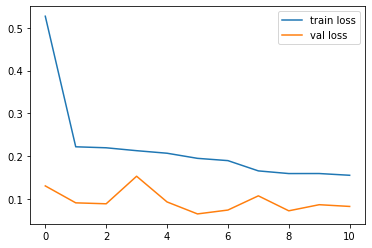

In [16]:
# visualization of loss
plt.plot(res_cnnmodel.history['loss'],label='train loss')
plt.plot(res_cnnmodel.history['val_loss'],label='val loss')
plt.legend()
plt.show()

In [17]:
pred_cnn=cnnmodel.predict(test_data)
pred_cnn=pred_cnn.argmax(axis=1)
pred_cnn

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

Evaluation

In [18]:
train_accuracy=cnnmodel.evaluate(train_data)[1]
test_accuracy=cnnmodel.evaluate(test_data)[1]
print('Accuracy of CNN')
print('Train Accuracy: ',train_accuracy,'\nTest Accuracy: ',test_accuracy)

25/25 [==============================] - 9s 365ms/step - loss: 0.0830 - accuracy: 0.9702
Accuracy of CNN
Train Accuracy:  0.9401574730873108 
Test Accuracy:  0.9701685905456543


In [19]:
pred_cnn=cnnmodel.predict(val_data)
pred_cnn=pred_cnn.argmax(axis=1)
pred_cnn

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [21]:
pred = pd.DataFrame(pred_cnn)
sub_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pnevmoniya/sample_solution.csv')
datasets = pd.concat([sub_df['id'],pred],axis=1)
datasets.columns=['id','labels']
datasets.to_csv('sample_submission.csv',index=False)

In [23]:
df2 = pd.read_csv('/content/sample_submission.csv')
df2

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,1
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,1
...,...,...
619,test_img_10620.jpeg,1
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,1
